In [1]:

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
import data_preprocessor as dp
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.tsa.stattools as ts
from itertools import product                    # some useful functions

In [3]:
#version in mac
#filepath = "E:/csvfile/source/"
filepath = "raw_data/"
filesinpath = os.listdir(filepath)
for f in sorted(filesinpath): #for each file, ran model
    f='new_data_sno1.csv'
    print("file name:", f)
    df = pd.read_csv(filepath + f)
    df = df[df.sno != 'sno']
    df = df.drop_duplicates()
    df['time'] = pd.to_datetime(df['mday'], format='%Y/%m/%d %H%M%S', errors='ignore') 
    df = df.set_index(pd.DatetimeIndex(df['time']))
    df = df.sort_index()
    df=df.drop(columns=['mday'])
    break

file name: new_data_sno1.csv


FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/new_data_sno1.csv'

In [12]:
filepath = "E:/csvfile/source/"
filesinpath = os.listdir(filepath)
for f in sorted(filesinpath): #for each file, ran model
    print("file name:", f)
    df = pd.read_csv(filepath + f)
    df = df[df.sno != 'sno']
    df = df.drop_duplicates(keep='first')
    l = len(df)  
    df['time'] =  pd.date_range("2018-02-01", periods=l, freq="H")
    #df['time'] = pd.to_datetime(df['Unnamed: 0'], format='%Y/%m/%d %H%M%S', errors='ignore') 
    df = df.set_index(pd.DatetimeIndex(df['time']))
    df = df.sort_index()
    df=df.drop(columns=['Unnamed: 0']).asfreq('H')
    break
    

file name: data_sno_001.csv


In [13]:
print(df)
ny = dp.data_preprocess(df)

                     act                bemp                 lat  \
time                                                               
2018-02-01 00:00:00  1.0  48.083333333333336  25.040857888900003   
2018-02-01 01:00:00  1.0  50.333333333333336  25.040857888900003   
2018-02-01 02:00:00  1.0  51.916666666666664  25.040857888900003   
2018-02-01 03:00:00  1.0  53.666666666666664  25.040857888900003   
2018-02-01 04:00:00  1.0                55.1  25.040857888900003   
...                  ...                 ...                 ...   
2018-12-31 12:00:00  1.0  37.398305084745765  25.040857888900007   
2018-12-31 13:00:00  1.0   44.60344827586207  25.040857888900003   
2018-12-31 14:00:00  1.0   54.73275862068966  25.040857888900003   
2018-12-31 15:00:00  1.0   72.23333333333333  25.040857888900007   
2018-12-31 16:00:00  1.0   80.67647058823529  25.040857888899946   

                                    lng                 sbi  sno    tot  HUMD  \
time                              

In [14]:
ny = ny['20180301':'20180630']
small_ny = ny['20180601':'20180630']
ts = small_ny.sbi

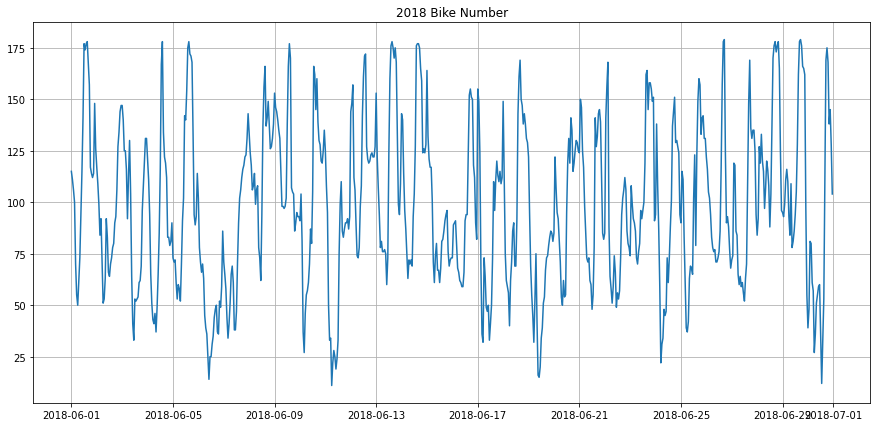

In [15]:
plt.figure(figsize=(15, 7))
plt.plot(small_ny.bemp)
plt.title('2018 Bike Number')
plt.grid(True)
plt.show()

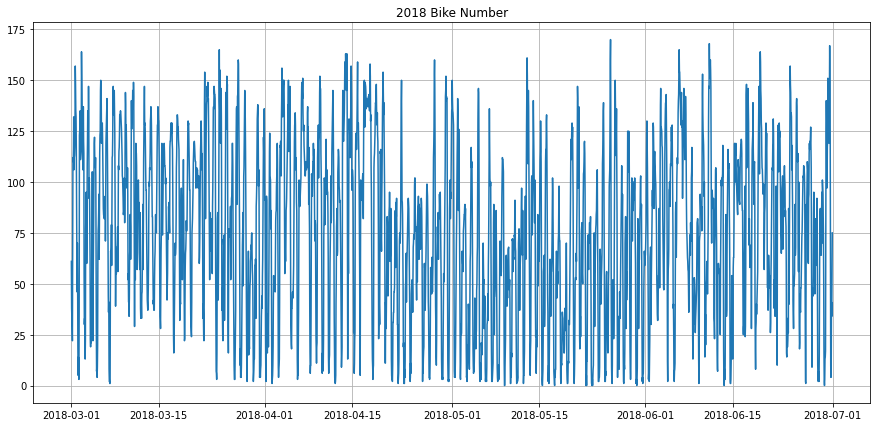

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(ny.sbi)
plt.title('2018 Bike Number')
plt.grid(True)
plt.show()

In [17]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    rmse = np.sqrt(mean_squared_error(series[window:], rolling_mean[window:]))

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        print('deviation:',deviation)
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        print(lower_bond)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

deviation: 36.65080973885103
time
2018-06-01 00:00:00          NaN
2018-06-01 01:00:00          NaN
2018-06-01 02:00:00          NaN
2018-06-01 03:00:00          NaN
2018-06-01 04:00:00          NaN
                         ...    
2018-06-30 19:00:00    -4.735893
2018-06-30 20:00:00   -11.985893
2018-06-30 21:00:00   -19.485893
2018-06-30 22:00:00   -25.235893
2018-06-30 23:00:00   -28.902560
Name: sbi, Length: 720, dtype: float64


36.65208832663841

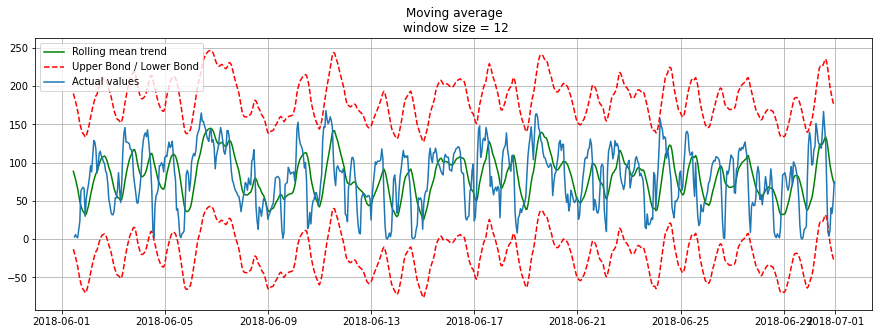

In [18]:
plotMovingAverage(ts, 12, plot_intervals=True)

deviation: 26.510140725132654
time
2018-06-01 00:00:00          NaN
2018-06-01 01:00:00          NaN
2018-06-01 02:00:00          NaN
2018-06-01 03:00:00          NaN
2018-06-01 04:00:00          NaN
                         ...    
2018-06-30 19:00:00   -11.752826
2018-06-30 20:00:00   -29.252826
2018-06-30 21:00:00   -44.586160
2018-06-30 22:00:00   -47.252826
2018-06-30 23:00:00   -36.419493
Name: sbi, Length: 720, dtype: float64


26.510714175127745

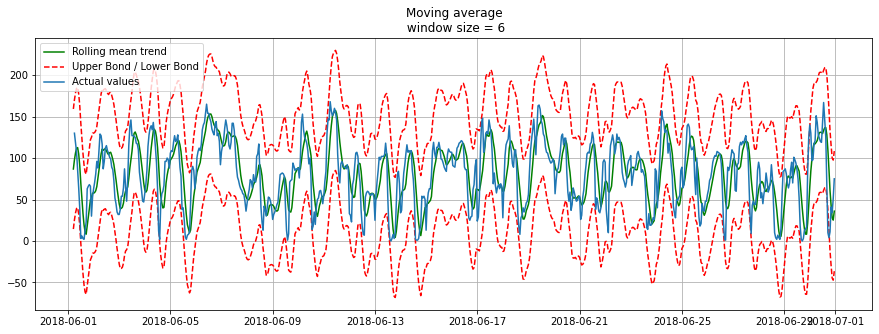

In [19]:
plotMovingAverage(ts, 6, plot_intervals=True)

deviation: 15.338247783340313
time
2018-06-01 00:00:00          NaN
2018-06-01 01:00:00          NaN
2018-06-01 02:00:00    27.228992
2018-06-01 03:00:00    32.562325
2018-06-01 04:00:00    46.562325
                         ...    
2018-06-30 19:00:00   -33.104342
2018-06-30 20:00:00   -22.771008
2018-06-30 21:00:00   -12.771008
2018-06-30 22:00:00     0.562325
2018-06-30 23:00:00    11.895658
Name: sbi, Length: 720, dtype: float64


15.338249368583629

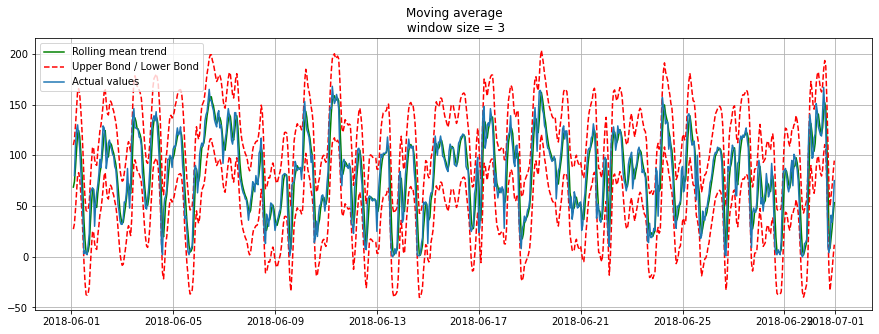

In [20]:
plotMovingAverage(ts, 3, plot_intervals=True)

In [21]:
def plotHistoricalAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(15,5))
    plt.title("Historical Average")
    remain_size = len(series) - window
    historical_mean = pd.Series([series[:window].mean()] * remain_size,index=series[window:].index)
    plt.plot(historical_mean, "g", label="Historical Mean")
    rmse = np.sqrt(mean_squared_error(series[window:], historical_mean))

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], historical_mean)
        deviation = np.std(series[window:]- historical_mean)
        lower_bond = historical_mean - (mae + scale * deviation)
        upper_bond = historical_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

39.0757348690406

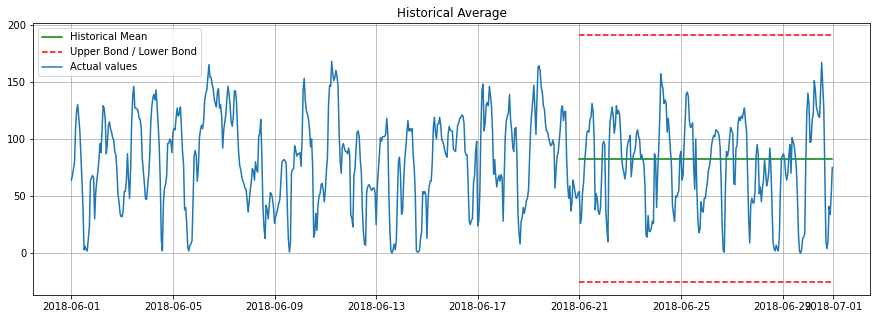

In [22]:
plotHistoricalAverage(ts,24*20,plot_intervals=True)

In [23]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        y.plot(ax=ts_ax)
        result = sm.tsa.stattools.adfuller(y)
        print(result)
        p_value = result[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

(-4.027249357607757, 0.0012743581846310853, 20, 699, {'1%': -3.439739809554328, '5%': -2.86568368980381, '10%': -2.5689766074363334}, 5899.5245020265465)


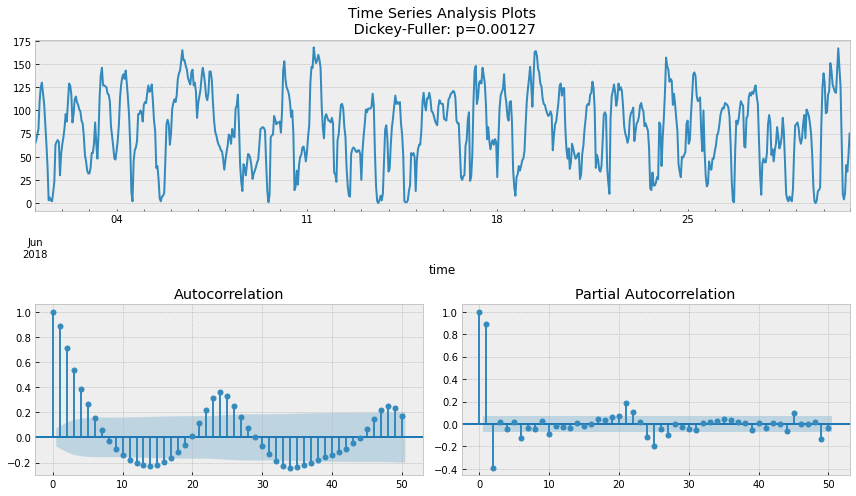

In [24]:
tsplot(ts,lags=50)

In [25]:
ps = range(0, 4)
d = 1
qs = range(1, 3)
Ps = range(0, 4)
D= 1
Qs = range(1, 4)
s = 24 # season length is still 24
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(len(parameters_list))
train_ts = ts['20180601':'20180620']

96


In [26]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in parameters_list:
        print('param:',param)
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(train_ts.values, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(low_memory=True)
        except:
            continue
            
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
result_table = optimizeSARIMA(parameters_list, d, D, s)

param: (0, 1, 0, 1)
param: (0, 1, 0, 2)
param: (0, 1, 0, 3)
param: (0, 1, 1, 1)
param: (0, 1, 1, 2)
param: (0, 1, 1, 3)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (0, 1, 2, 1)
param: (0, 1, 2, 2)
param: (0, 1, 2, 3)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (0, 1, 3, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (0, 1, 3, 2)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (0, 1, 3, 3)


In [ ]:
p, q, P, Q = result_table.parameters[0]
train_ts = train_ts.asfreq('H')
best_model=sm.tsa.statespace.SARIMAX(train_ts, order=(p, d, q),seasonal_order=(P, D, Q, s))

In [ ]:
best_fit = best_model.fit()
best_fit.summary()

In [ ]:
result_table

In [ ]:
tsplot(best_fit.resid[24+1:], lags=60)

In [ ]:
def plotSARIMA(series, window, model, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(15,5))
    plt.title("SRAIMA")
    remain_size = len(series) - window
    prediction = model.predict(start=window, end=len(series)-1)
    pred_s = pd.DataFrame(prediction, index = series[window:].index)
    
    plt.plot(pred_s, "r", label="Prediction")
    
    rmse = np.sqrt(mean_squared_error(series[window:], prediction))

    # Plot confidence intervals for smoothed values
    if False:
        mae = mean_absolute_error(series[window:], prediction) # truth and prediction
        deviation = np.std(series[window:]- prediction)
        lower_bond = prediction - (mae + scale * deviation)
        lower_bond_df = pd.DataFrame(lower_bond, index = series[window:].index)
        upper_bond = prediction + (mae + scale * deviation)
        upper_bond_df = pd.DataFrame(upper_bond, index = series[window:].index)
        plt.plot(upper_bond_df, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond_df, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
            
    if True:
        ax.fill_between(pred_s.index, pred_s.iloc[:, 0],pred_s.iloc[:, 1], color='k', alpha=.2)
        
    plt.plot(series, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

In [ ]:
error = np.sqrt(mean_squared_error(ts.values, predictions))
plt.figure(figsize=(20, 7))
plt.title("Mean Squared Error: {0:.2f}".format(error))
plt.plot(predictions, color='r', label="model")
#plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts.values, label="actual")
plt.legend()
plt.grid(True);

In [ ]:
win = len(ts['20180601':'20180620'])
plotSARIMA(ts,win, best_fit, plot_intervals = True)

In [ ]:
best_fit.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
pred = best_fit.get_prediction(start=win, dynamic=False)
pred_ci = pred.conf_int(alpha=0.05)
ax = ts.plot(label='observed')
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
pred2 = best_fit.predict(start=win, dynamic=False)
pred2.plot_predict()